V
797.3522034006443


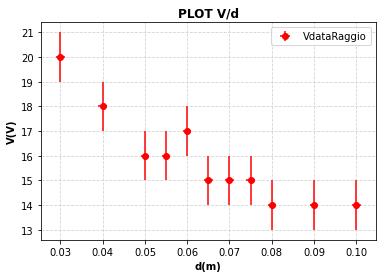

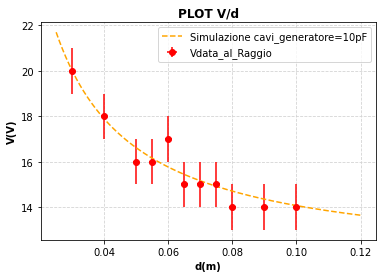

1.13e-10


In [1]:
#generatore al condensatore 1000VDC
#elettrometro all ice pail
#toccare il condensatore -> toccare la gabbia -> misurare Ve
#-> ricavare Q bacchetta -> ricavare ro bacchetta = ro condensatore
#misurare ro condensatore vicino al centro, all'estremità ed in mezzo
#ricavare la funzione di distribuzione della densità sul condensatore
#integrare e ricavare Q

import numpy as np
import matplotlib.pyplot as plt

#Rc-1cm, mezzo, centro+1cm 
#Vdata = np.array([[0.49528954,0.62156064,0.7254411,0.81251938,1.00183574,1.25567714,1.62471029,2.42432367],[2.20403846,2.76594483,3.2282129,3.61571125,4.45816902,5.58776329,7.22996081 ,10.78824034],[3.91278738,4.91032903,5.73098471,6.41890311,7.91450231,9.91984943,12.83521132,19.15215701]])

Vdata = np.array([[17,15,14,14,14,16,18,20,16,15,15],[12,13,12,11,11,15,16,15,12,11,11],[11,11,9,9,9,12,10,11,9,9,9]])

Vdataerr = np.copy(Vdata)

for i in range(len(Vdata)):
  for j in range (len(Vdata[0])):
    Vdataerr[i][j] = 2
    if(Vdata[i][j]<30):
      Vdataerr[i][j] = 1.3
      if(Vdata[i][j]<10):
        Vdataerr[i][j] = 0.2
        if(Vdata[i][j]<3):
          Vdataerr[i][j] = 0.13
#Vdata[0] = Vdata[0]-np.random.normal(0, Vdataerr[0], len(Vdata[0]))
#Vdata[1] = Vdata[1]-np.random.normal(0, Vdataerr[1], len(Vdata[1]))
#Vdata[2] = Vdata[2]-np.random.normal(0, Vdataerr[2], len(Vdata[2]))

#d = np.array([0.10,0.08,0.07,0.06,0.05,0.04,0.03,0.02])
d = np.array([0.06,0.07,0.08,0.09,0.1,0.05,0.04,0.03,0.055,0.065,0.075])
derr = 0.001
#commentare
#d = d-np.random.normal(0, derr, len(d))

eps0 = 8.859E-12
DBacchetta = 0.0320
DBacchettaerr = 0.0001

Dc = 0.178
Rc = Dc/2
Dcerr = 0.0005
#Dc = Dc-np.random.normal(0, Dcerr, 1)
#Dc = 

A = np.pi/4*Dc**2
A_err = A*2*Dcerr/Dc

D1 = 0.09945
D2 = 0.14575
D2 = 0.1492

D2 = 0.1475

D1err = 0.0001
D2err = 0.003
L = 0.1554
Lerr = 0.0001


b = eps0*A
berr = b*A_err/A

Cc = b/d
Ccerr = Cc*((A_err/A)**2+(derr/d)**2)**(1/2)


DBacchetta = 0.0320
DBerr = 0.0001
SBacchetta = np.pi/4*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta




Cg = 2*np.pi*eps0*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Sicepail = np.pi*D1*L/10
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

Ce = 1.13e-10
Ce_err = 2.76824077e-11
C_cavigen = 5e-12

V = 1000
Q = (Cc+C_cavigen)*V
Qerr = Q*((Ccerr/Cc)**2+(0.1)**2)**(1/2)
Qb = Q*SBacchetta/A
Qgabbia = Qb*Sicepail/SBacchetta

Vsimulated0 = Qgabbia/(Cg+Ce)


Qgabbia = (Cg+Ce)*(Vdata[0][7])
Qb = Qgabbia*SBacchetta/Sicepail
Q = Qb*A/SBacchetta
V = Q/(Cc[7]+10e-12)

print("V")
print(V)


d2 = np.linspace(0.025,0.12,1000)
Cc = b/d2
Q = (Cc+10e-12)*V

Qb = Q*SBacchetta/A

Qgabbia = Qb*Sicepail/SBacchetta


Vsimulated = Qgabbia/(Cg+Ce)


#PLOT V/d

fig = plt.figure()
ax = fig.gca()
plt.title("PLOT V/d",fontweight="bold")
plt.xlabel("d(m)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.errorbar(d, Vdata[0], yerr=Vdataerr[0] , xerr=derr, fmt='o',label="VdataRaggio",color="red")

plt.legend(loc="best")
plt.show()

#PLOT V/d

fig = plt.figure()
ax = fig.gca()
#ax.set_xscale("log")
#ax.set_yscale("log")
plt.title("PLOT V/d",fontweight="bold")
plt.xlabel("d(m)",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.errorbar(d, Vdata[0], yerr=Vdataerr[0] , xerr=derr, fmt='o',label="Vdata_al_Raggio",color="red")
#plt.errorbar(d, Vsimulated0 ,label="Simulation with C-gencables = 7pF",color="orange", fmt='o')
#plt.plot(d2, Vsimulated ,label="Fit with C-gencables = 7pF",color="green")
#plt.plot(d2, Vsimulated2 ,label="Fit with C-gencables = 10pF",color="blue")
plt.plot(d2,Vsimulated, color="orange", linestyle='--', label="Simulazione cavi_generatore=10pF")
plt.legend(loc="best")
plt.show()



print(Ce)